In [1]:
# Import libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import median_abs_deviation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# Mapping of product names
productname_to_num= {
    'American Cheese': 0,
    'Bananas': 1,
    'Beef chunks': 2,
    'Beef steaks': 3,
    'Bread': 4,
    'Cheddar cheese': 5,
    'Chicken': 6,
    'Eggs': 7,
    'Flour': 8,
    'Milk': 9,
    'Oranges': 10,
    'Pork': 11,
    'Rice': 12,
    'Strawberries': 13,
    'Tomatoes': 14
}

# Mapping of category names
category_to_num = {
    'Animal Products': 0,
    'Dairy Products': 1,
    'Fruits': 2,
    'Grains': 3
}

In [3]:
# Put CSV files in dataframes
df_products = pd.read_csv("all_products.csv")
df_inflation = pd.read_csv("inflation_per_month.csv")
df_nasdaq = pd.read_csv("nasdaq_historical_data.csv")
df_temp = pd.read_csv("average_temp.csv")
df_ppi = pd.read_csv("ppi_annual_change.csv")
df_oil = pd.read_csv("crude_oil_prices.csv")

In [4]:
# Show first 5 rows of products dataframe
df_products.head()

,product_name,year,month,us_city_average_retail_price,category
0,American Cheese,1984,1,2.485,Dairy Products
1,American Cheese,1984,2,2.495,Dairy Products
2,American Cheese,1984,3,2.493,Dairy Products
3,American Cheese,1984,4,2.501,Dairy Products
4,American Cheese,1984,5,2.472,Dairy Products


In [5]:
# Show first 5 rows of average inflation rate
df_inflation.head()

,DATE,CPIUFDNS_PC1
0,1914-01-01,6.18557
1,1914-02-01,4.16667
2,1914-03-01,2.08333
3,1914-04-01,-1.03093
4,1914-05-01,1.04167


In [6]:
# Show first five row of average monthly nasdaq stock price dataframe
df_nasdaq.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-01-01,247.100006,278.899994,245.800003,278.700012,278.700012,1782060000
1,1985-02-01,277.899994,289.299988,277.899994,284.200012,284.200012,1742850000
2,1985-03-01,285.100006,287.799988,275.600006,279.200012,279.200012,1611310000
3,1985-04-01,279.500000,284.799988,276.200012,280.600006,280.600006,1506450000
4,1985-05-01,280.500000,294.799988,278.799988,290.799988,290.799988,1673270000


In [7]:
# Show first five rows of average US temperature dataframe
df_temp.head()

,Date,Value,Anomaly
0,198001,31.12,1.00
1,198002,32.85,-0.97
2,198003,39.36,-2.14
3,198004,51.44,0.39
4,198005,60.28,0.08


In [8]:
# Show first five rows of average PPI rate
df_ppi.head()

,ppi_item,year,ppi_annual_change_in_perc
0,Animal Products,1974,-0.0530
1,Animal Products,1975,0.1164
2,Animal Products,1976,-0.0446
3,Animal Products,1977,-0.0154
4,Animal Products,1978,0.1718


In [9]:
# Keep first 3 columns of oil price df
df_oil = df_oil.iloc[:, :3]

# Show first five rows of oil price dataframe
df_oil.head()

,month,year,OK_WTI_Spot_Price
0,5,1987,19.44
1,6,1987,20.07
2,7,1987,21.34
3,8,1987,20.31
4,9,1987,19.53


In [10]:
# Convert date feature from nasdaq dataframe to datetime format
date = pd.to_datetime(df_nasdaq['Date'], format='%Y-%m-%d')

# Put month & year values of Date feature of nasdaq dataframe in seperate columns
df_nasdaq['year'] = date.dt.year
df_nasdaq['month'] = date.dt.month

# Drop Date feature from nasdaq dataframe
df_nasdaq.drop(['Date'], axis=1, inplace=True)

In [11]:
# Convert date feature from inflation dataframe to datetime format
date = pd.to_datetime(df_inflation['DATE'], format='%Y-%m-%d')

# Put month & year values of Date feature of inflation dataframe in seperate columns
df_inflation['year'] = date.dt.year
df_inflation['month'] = date.dt.month

# Drop DATE feature from inflation dataframe
df_inflation.drop(['DATE'], axis=1, inplace=True)

# Rename 'CPIUFDNS_PC1' feature to 'cpi_overall_monthly_change_in_perc'
df_inflation.rename(columns={"CPIUFDNS_PC1": "cpi_overall_monthly_change_in_perc"}, inplace=True)

In [12]:
# Get first 4 numbers of 'Date' feature of temperature dataframe and put in year column
df_temp['year'] = df_temp.Date.astype(str).str[:4].astype(int)

# Get last 2 numbers of 'Date' feature of temperature dataframe and put in month column
df_temp['month'] = df_temp.Date.astype(str).str[-2:].astype(int)

# Drop unnecessary 'Date' and 'Anomaly' features
df_temp.drop(['Date', 'Anomaly'], axis=1, inplace=True)

# Rename 'Value' feature to 'average_temp'
df_temp.rename(columns={"Value": "average_temp"}, inplace=True)

In [13]:
# Get the mean of all products prices per month & year in products dataframe
prd_price = df_products.groupby(by=['category','product_name', 'year','month']).mean().reset_index()

# Sort dataframe on product name, month & year
prd_price = prd_price.sort_values(by=['category', 'product_name', 'month', 'year'])

In [14]:
# Left join nasdaq dataframe to products dataframe on year & month
df = pd.merge(prd_price, df_nasdaq, how='left', on=['year', 'month'])

In [15]:
# Get rows with years later than 1985 and keep only open price feature of nasdaq dataframe
df = df[df['year'] >= 1985].iloc[:, 0:6]

# Show first five rows of merged dataframe
df.head()

,category,product_name,year,month,us_city_average_retail_price,Open
5,Animal Products,Beef chunks,1985,1,1.711,247.100006
6,Animal Products,Beef chunks,1986,1,1.662,325.000000
7,Animal Products,Beef chunks,1987,1,1.694,351.299988
8,Animal Products,Beef chunks,1988,1,1.736,335.100006
9,Animal Products,Beef chunks,1989,1,1.806,378.899994


In [16]:
# Left join average US temperature data on year & month
df = pd.merge(df, df_temp,  how='left', on=['year', 'month'])

# Left join oil prices data on year & month
df = pd.merge(df, df_oil,  how='left', on=['year', 'month'])

# Show first five rows of merged dataframe
df.head()

,category,product_name,year,month,us_city_average_retail_price,Open,average_temp,OK_WTI_Spot_Price
0,Animal Products,Beef chunks,1985,1,1.711,247.100006,26.31,NaN
1,Animal Products,Beef chunks,1986,1,1.662,325.000000,34.68,NaN
2,Animal Products,Beef chunks,1987,1,1.694,351.299988,31.44,NaN
3,Animal Products,Beef chunks,1988,1,1.736,335.100006,27.79,17.13
4,Animal Products,Beef chunks,1989,1,1.806,378.899994,34.09,18.02


In [17]:
# Set index of dataframe to category, product_name, year & month features
df = df.set_index(['category', 'product_name', 'year', 'month'])

# Get difference in percentage of product price, nasdaq stock, average temperature & oil price with the value in the same month a year prior 
# Reset index back to original index
avg_diff = df.pct_change().reset_index()

# Show first five rows of dataframe
avg_diff.head()

,category,product_name,year,month,us_city_average_retail_price,Open,average_temp,OK_WTI_Spot_Price
0,Animal Products,Beef chunks,1985,1,NaN,NaN,NaN,NaN
1,Animal Products,Beef chunks,1986,1,-0.028638,0.315257,0.318130,NaN
2,Animal Products,Beef chunks,1987,1,0.019254,0.080923,-0.093426,NaN
3,Animal Products,Beef chunks,1988,1,0.024793,-0.046114,-0.116094,NaN
4,Animal Products,Beef chunks,1989,1,0.040323,0.130707,0.226700,0.051956


In [18]:
# Left join average inflation data on year & month
avg_diff = pd.merge(avg_diff, df_inflation,  how='left', on=['year', 'month'])

# Left join average ppi data on category & year
avg_diff = pd.merge(avg_diff, df_ppi,  how='left', left_on=['category', 'year'], right_on=['ppi_item', 'year'])
avg_diff = avg_diff.drop(columns=['ppi_item'], axis=1)

# Show first five rows of dataframe
avg_diff.head()

,category,product_name,year,month,us_city_average_retail_price,Open,average_temp,OK_WTI_Spot_Price,cpi_overall_monthly_change_in_perc,ppi_annual_change_in_perc
0,Animal Products,Beef chunks,1985,1,NaN,NaN,NaN,NaN,2.64706,-0.0802
1,Animal Products,Beef chunks,1986,1,-0.028638,0.315257,0.318130,NaN,2.76982,0.0350
2,Animal Products,Beef chunks,1987,1,0.019254,0.080923,-0.093426,NaN,4.18216,0.0102
3,Animal Products,Beef chunks,1988,1,0.024793,-0.046114,-0.116094,NaN,3.21142,0.0244
4,Animal Products,Beef chunks,1989,1,0.040323,0.130707,0.226700,0.051956,5.61798,0.1140


In [19]:
# Normalize year and month features by dividing with their max value
avg_diff['year'] = avg_diff['year'] / avg_diff['year'].abs().max()
avg_diff['month'] = avg_diff['month'] / avg_diff['month'].abs().max()

In [20]:
# Divide inflation percentage by 100 to normalize feature
avg_diff['cpi_overall_monthly_change_in_perc'] = avg_diff['cpi_overall_monthly_change_in_perc']/100

In [21]:
# Renaming column names for more clarity on feature meaning
avg_diff.rename(columns={'us_city_average_retail_price':'avg_price_diff_in_perc', 'Open':'nasdaq_open_price', 'cpi_overall_monthly_change_in_perc':'overall_inflation_in_perc', 'OK_WTI_Spot_Price':'avg_oil_price_diff'}, inplace=True)

In [22]:
# Use mapping to convert values in category and product_name features to integers
avg_diff = avg_diff.replace({"product_name": productname_to_num})
avg_diff = avg_diff.replace({"category": category_to_num})

# Show first five rows of dataframe
avg_diff.head()

,category,product_name,year,month,avg_price_diff_in_perc,nasdaq_open_price,average_temp,avg_oil_price_diff,overall_inflation_in_perc,ppi_annual_change_in_perc
0,0,2,0.981701,0.083333,NaN,NaN,NaN,NaN,0.026471,-0.0802
1,0,2,0.982196,0.083333,-0.028638,0.315257,0.318130,NaN,0.027698,0.0350
2,0,2,0.982690,0.083333,0.019254,0.080923,-0.093426,NaN,0.041822,0.0102
3,0,2,0.983185,0.083333,0.024793,-0.046114,-0.116094,NaN,0.032114,0.0244
4,0,2,0.983680,0.083333,0.040323,0.130707,0.226700,0.051956,0.056180,0.1140


In [23]:
# Make copy of dataframe to remove outliers
remove_outlier = avg_diff.copy()

# Remove outliers from food price difference feature
remove_outlier = remove_outlier[remove_outlier['avg_price_diff_in_perc'].between(remove_outlier['avg_price_diff_in_perc'].quantile(.15), remove_outlier['avg_price_diff_in_perc'].quantile(.85))]

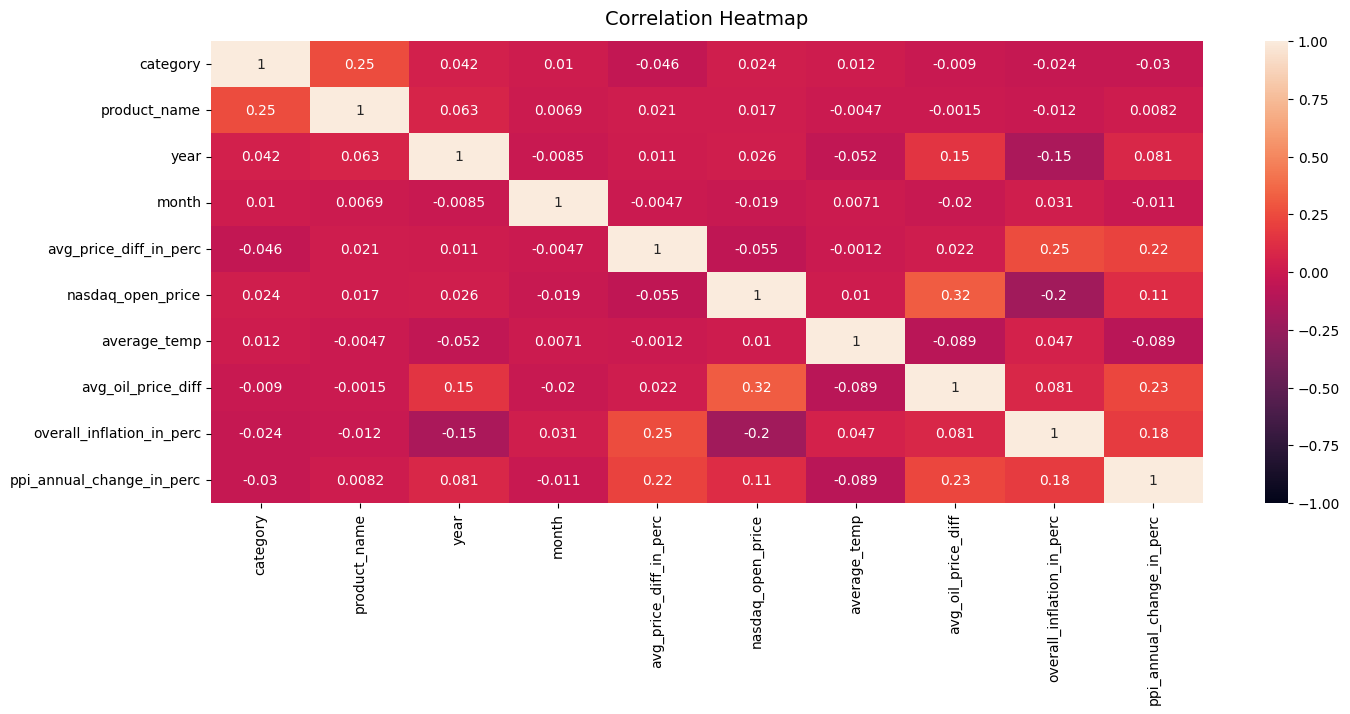

In [24]:
# See if there is a correlation with average price difference and the other features
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(remove_outlier.corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

Text(0.5, 1.0, 'Price Change Correlated with Oil Price Change in Comparison With Preceding Year')

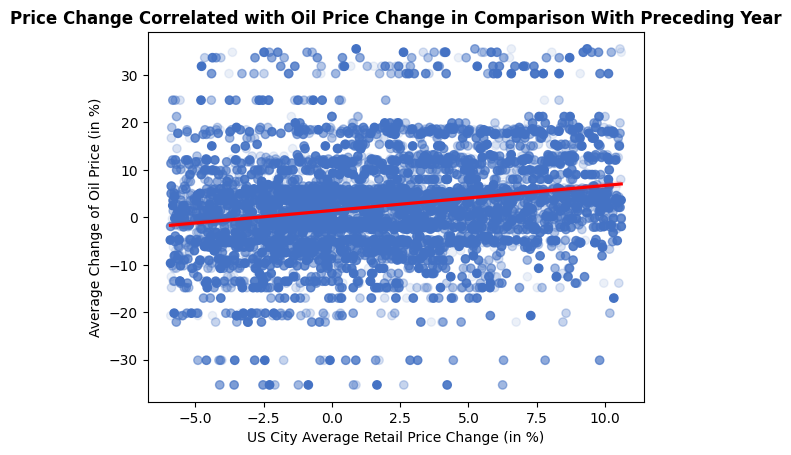

In [25]:
# Visualize features in a regression plot with average price difference
ax = sns.regplot(x='avg_price_diff_in_perc', y='ppi_annual_change_in_perc',
              scatter_kws = {"color": "#4472C4", "alpha": np.linspace(0.1, 1, 10)},
              line_kws = {"color": "red"},
              data=remove_outlier*100)

# Specify axis titles
ax.set(xlabel='US City Average Retail Price Change (in %)',
       ylabel=f'Average Change of Oil Price (in %)',
       )

# Specify visualization title
ax.set_title(f'Price Change Correlated with Oil Price Change in Comparison With Preceding Year', fontdict= {'fontweight':'bold'})

In [26]:
# Removing rows with NaN values
remove_outlier.dropna(inplace=True)

In [27]:
# Specifying which features are the dependent and independent features
X = remove_outlier.loc[1:, ['category', 'year', 'month', 'average_temp', 'avg_oil_price_diff', 'overall_inflation_in_perc', 'ppi_annual_change_in_perc']]
y = remove_outlier.loc[1:, ['avg_price_diff_in_perc']]

In [28]:
# Creating the train and test dataset
# We used two methods to control overfitting

# Method 1 Random splitting:

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.3, random_state=101)

# Method 2 Specific splitting:
X_train = X.iloc[:-1353, :]
X_test = X.iloc[-1353:, :]
y_train = y.iloc[:-1353, :]
y_test = y.iloc[-1353:, :]

In [29]:
# Show first five rows of X train dataset
X_train.head()

,category,year,month,average_temp,avg_oil_price_diff,overall_inflation_in_perc,ppi_annual_change_in_perc
4,0,0.983680,0.083333,0.226700,0.051956,0.056180,0.1140
5,0,0.984174,0.083333,0.070695,0.268590,0.067103,0.0588
6,0,0.984669,0.083333,-0.192329,0.103675,0.041411,-0.0466
7,0,0.985163,0.083333,0.140434,-0.255252,0.010309,-0.0626
8,0,0.985658,0.083333,-0.093694,0.012773,0.018950,0.0522


In [30]:
# Show first five rows of X test dataset
X_test.head()

,category,year,month,average_temp,avg_oil_price_diff,overall_inflation_in_perc,ppi_annual_change_in_perc
4351,2,0.995549,0.250000,-0.188455,-0.124529,0.015207,0.018
4356,2,0.998022,0.250000,-0.074106,0.271640,0.012863,-0.019
4358,2,0.999011,0.250000,0.143992,-0.497678,0.019339,0.020
4362,2,0.982196,0.333333,-0.027594,0.000000,0.020853,0.044
4367,2,0.984669,0.333333,0.000381,0.130222,0.041127,0.100


In [31]:
# Creating a regression model
model = LinearRegression()

In [32]:
# Train model with the created train datasets
model.fit(X_train,y_train)

LinearRegression()

In [33]:
# Show the model coefficients we acquired
print(model.coef_)

[[-0.00228913  1.19725079 -0.00171333  0.01424467 -0.00394917  1.00355716
   0.07018835]]


In [34]:
# Predict on the X data from the test set
predictions_test = model.predict(X_test)

# Predict on the X data from the train set
predictions_train = model.predict(X_train)

In [35]:
# model evaluation
print(
  'test mean_squared_error : ', mean_squared_error(y_test, predictions_test))
print(
  'test mean_absolute_error : ', mean_absolute_error(y_test, predictions_test))
print(
  'test root_mean_squared_error : ', np.sqrt(mean_squared_error(y_test, predictions_test))
)
print('------------')
print(
  'train mean_squared_error : ', mean_squared_error(y_train, predictions_train))
print(
  'train mean_absolute_error : ', mean_absolute_error(y_train, predictions_train))
print(
  'train root_mean_squared_error : ', np.sqrt(mean_squared_error(y_train, predictions_train))
)

test mean_squared_error :  0.0018313222824655033
test mean_absolute_error :  0.035636744879977686
test root_mean_squared_error :  0.04279395147057004
------------
train mean_squared_error :  0.00149578495348953
train mean_absolute_error :  0.03148637452772937
train root_mean_squared_error :  0.038675379164133994
